<h1 style="text-align: center;">Deep Learning<br><br>ANN<br><br>Churn Prediction for Bank Customers<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Importing Libraries & Data

In [39]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [40]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [41]:
!pip install seaborn --upgrade

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [43]:
df=pd.read_csv('Churn_Modelling.csv')
df0 = df.copy()

In [44]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implementing basic steps to see how the data looks like
2. Checking for missing values
3. Dropping the features that are not suitable for modelling
4. Implementing basic visualization steps such as histogram, countplot, and heatmap
5. Converting categorical variables to dummy variables

In [45]:
df.shape

(10000, 14)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [47]:
df.duplicated().sum()

0

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [49]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [50]:
df=df.drop(columns=['RowNumber','CustomerId', 'Surname'])

In [51]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [52]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

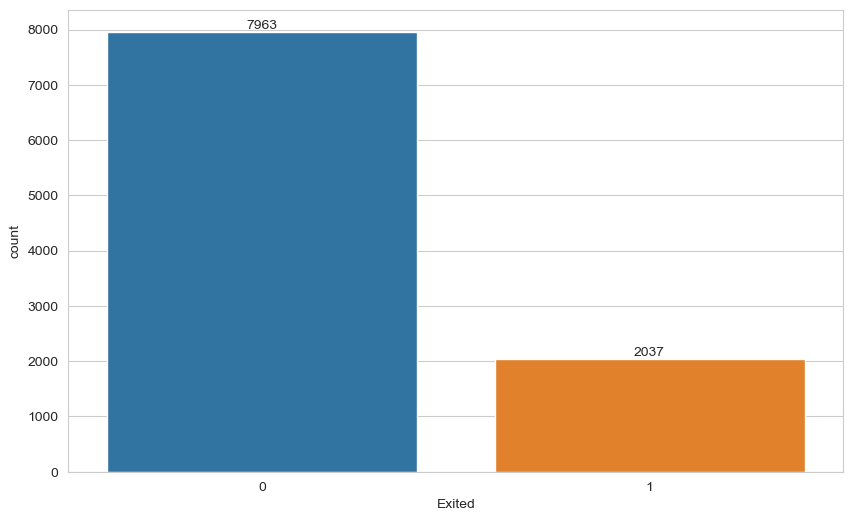

In [53]:
ax=sns.countplot(x=df['Exited'], hue=df['Exited'].astype(str))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

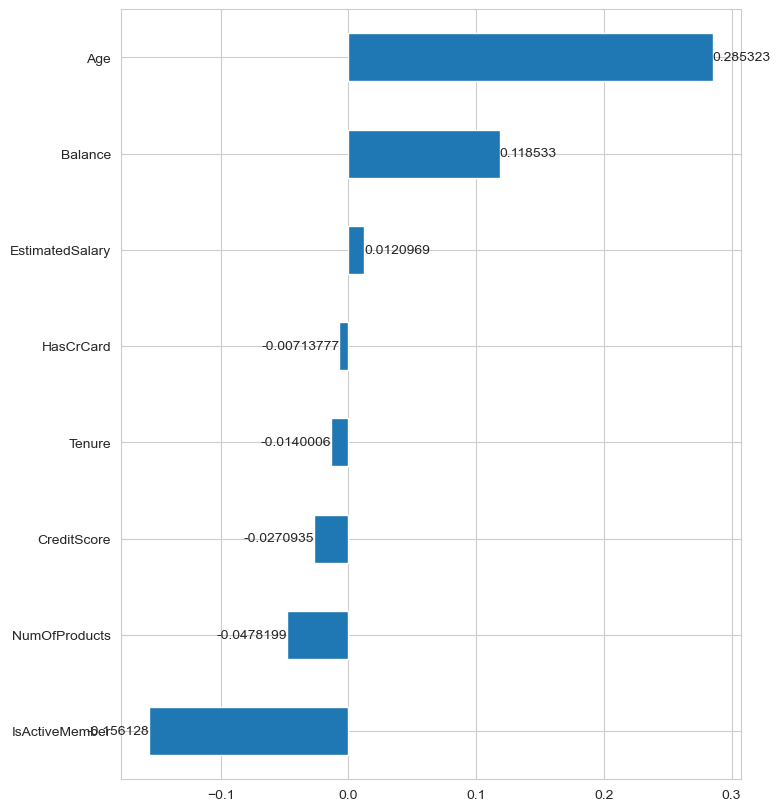

In [54]:
plt.figure(figsize=(8, 10))
ax = df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0])
plt.show()

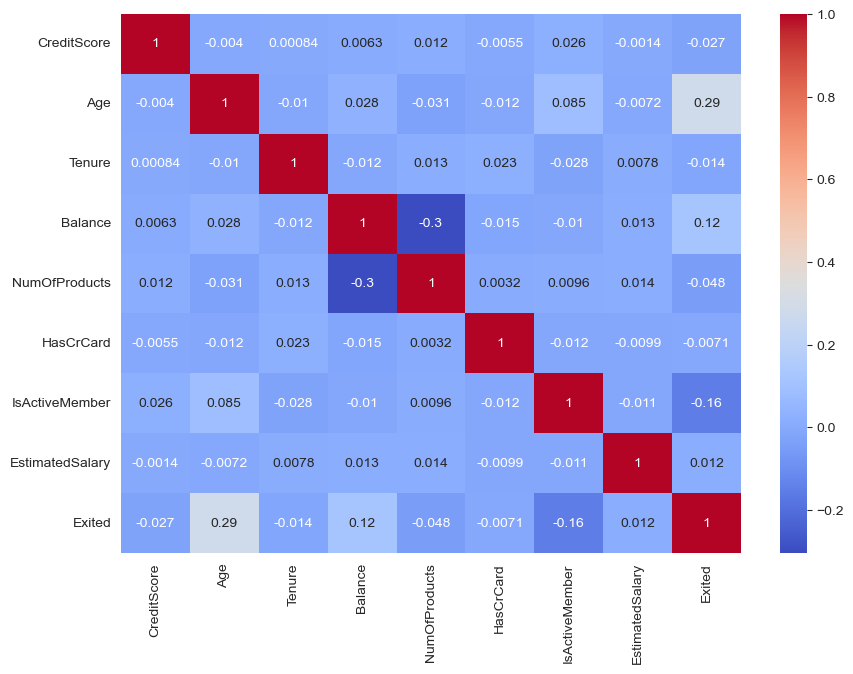

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm");

In [56]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

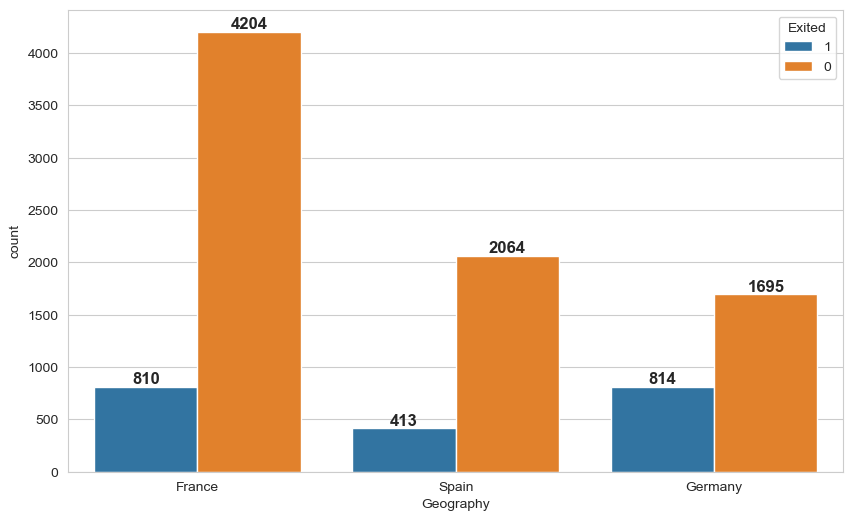

In [57]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Geography', data = df, hue = df['Exited'].astype(str))
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

In [58]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

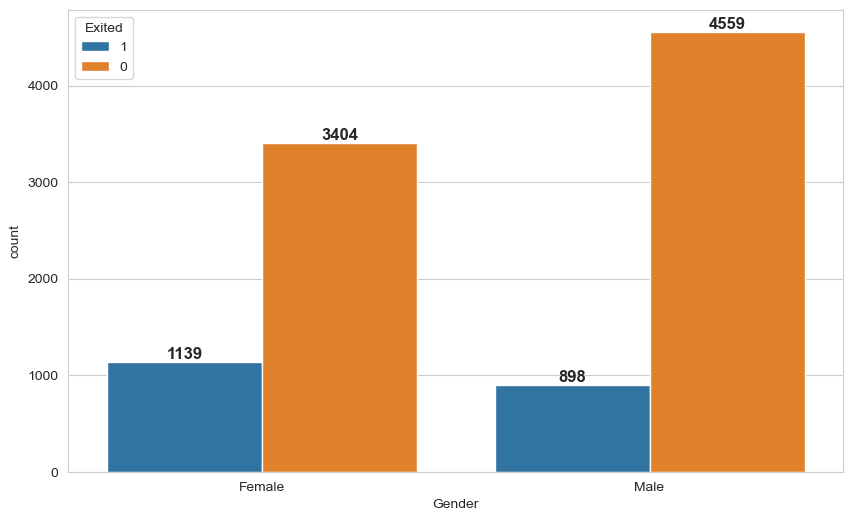

In [59]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender', data = df, hue = df['Exited'].astype(str))
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

In [60]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

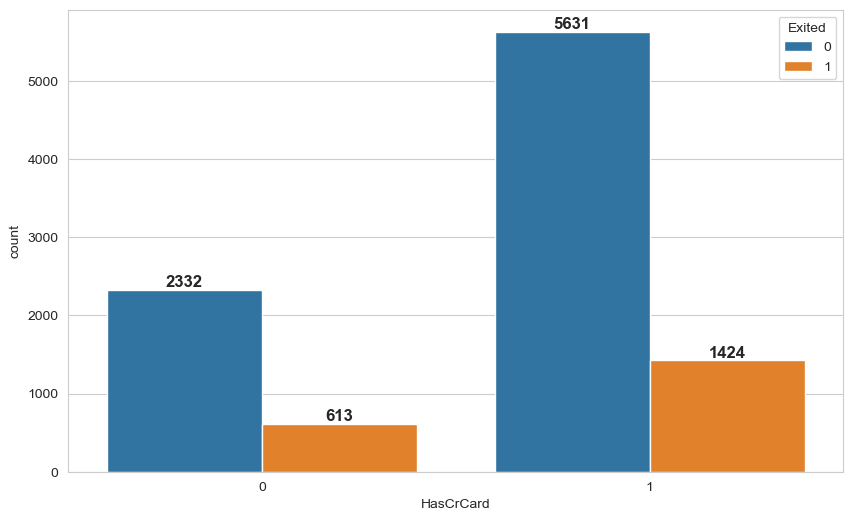

In [61]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='HasCrCard', data = df, hue = df['Exited'].astype(str))
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

In [62]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

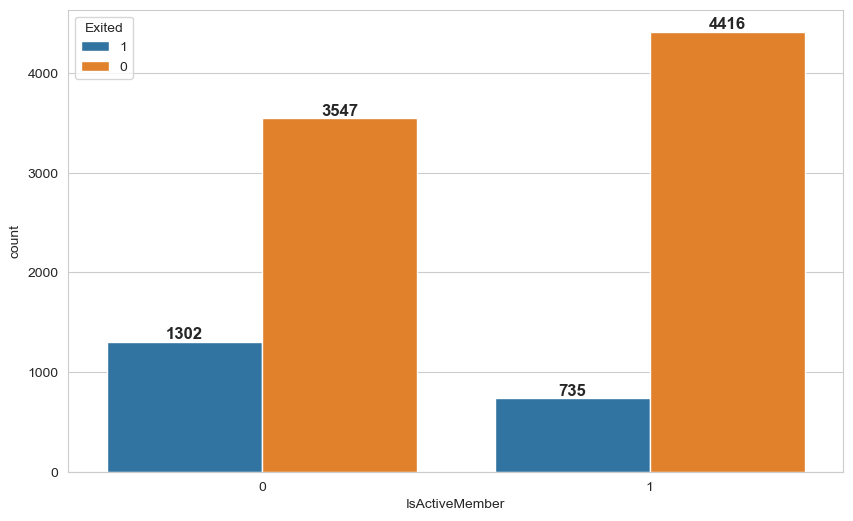

In [63]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='IsActiveMember', data = df, hue = df['Exited'].astype(str))
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

# Preprocessing of Data
- Train | Test Split, Scalling

In [64]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")

In [65]:
numeric_df = df.drop(['Geography','Gender'], axis=1)
encoded_features = encoder.fit_transform(df[['Geography','Gender']])
encoded_df = pd.DataFrame(encoded_features)
df = pd.concat([encoded_df, numeric_df], axis=1)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [67]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  # X and y are the input features and target labels
    stratify=y,  # Stratify the data to ensure the proportions of classes are the same in each set
    test_size=0.10,  # Specify the proportion of data to be used for testing
    random_state=42  # Set a random seed to ensure reproducibility
)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,  # X_train and y_train are the remaining training data
    stratify=y_train,  # Stratify the data to ensure the proportions of classes are the same in each set
    test_size=0.10,  # Specify the proportion of data to be used for validation
    random_state=42  # Set a random seed to ensure reproducibility
)


In [69]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Creating The Model

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate     #in deep learning normally we don't use cross validation
from sklearn.model_selection import GridSearchCV

In [71]:
batch_size = 32

In [72]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification. activation="softmax" yaparsak neuron sayisini 2 yapmamiz lazim. sonuclari 0 ve 1 lewr icin ayri aliriz bu durumda
model.add(Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [73]:
model.fit(
    # The training data is provided as x and y, where x is the input data and y is the target output.
    x=X_train, 
    y=y_train, 
    
    # The validation data is used to evaluate the model's performance during training.
    validation_data=(X_val, y_val), 
    
    # The batch size determines the number of samples that are processed before the model's weights are updated.
    batch_size=batch_size, 
    
    # The number of epochs specifies how many times the entire training dataset will be passed through the model.
    epochs=300, 
    
    # The verbose parameter controls the amount of information that is printed during training.
    verbose=1
)

Epoch 1/300
  1/254 [..............................] - ETA: 5:11 - loss: 0.6761 - accuracy: 0.5312

254/254 [==============================] - 4s 11ms/step - loss: 0.4942 - accuracy: 0.7928 - val_loss: 0.4694 - val_accuracy: 0.8000
Epoch 2/300
254/254 [==============================] - 2s 9ms/step - loss: 0.4457 - accuracy: 0.8043 - val_loss: 0.4474 - val_accuracy: 0.8044
Epoch 3/300
254/254 [==============================] - 2s 9ms/step - loss: 0.4219 - accuracy: 0.8175 - val_loss: 0.4263 - val_accuracy: 0.8078
Epoch 4/300
254/254 [==============================] - 2s 9ms/step - loss: 0.4078 - accuracy: 0.8236 - val_loss: 0.4216 - val_accuracy: 0.8100
Epoch 5/300
254/254 [==============================] - 2s 9ms/step - loss: 0.3930 - accuracy: 0.8330 - val_loss: 0.4052 - val_accuracy: 0.8178
Epoch 6/300
254/254 [==============================] - 2s 8ms/step - loss: 0.3803 - accuracy: 0.8409 - val_loss: 0.4029 - val_accuracy: 0.8167
Epoch 7/300
254/254 [==============================] - 2s 9ms/step - loss: 0.3668 - accuracy: 0.8442 - val_loss: 0.3916 - val_accuracy: 0.8244
Epoch 8/30

### Evaluating The Model

- Plotting the model history to observe the changing of metrics
- Making prediction to see "confusion matrix" and "classification report"
- Checking ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 36)                504       
                                                                 
 dense_9 (Dense)             (None, 18)                666       
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.494,0.793,0.469,0.800
1,0.446,0.804,0.447,0.804
2,0.422,0.818,0.426,0.808
3,0.408,0.824,0.422,0.810
4,0.393,0.833,0.405,0.818


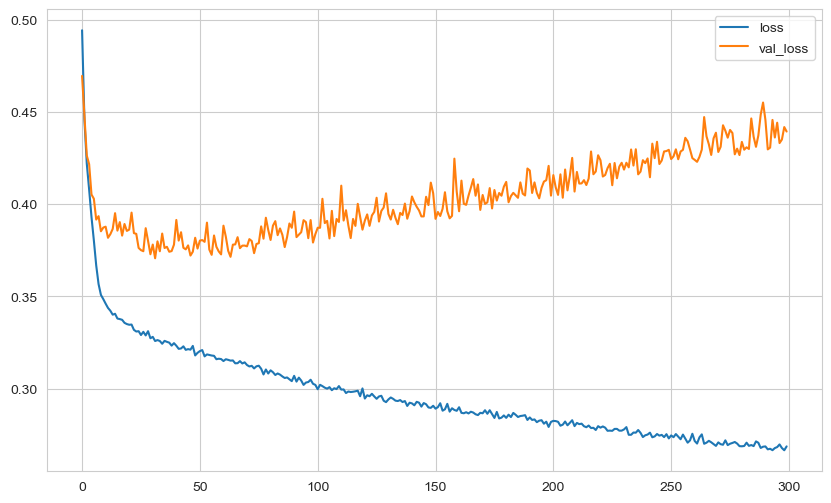

In [76]:
# If validation splits after certain value this means overfitting
loss_df[["loss","val_loss"]].plot()
plt.show()

In [77]:
model.evaluate(X_test, y_test, verbose=0)

[0.39357221126556396, 0.8519999980926514]

In [78]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.39357221126556396
accuracy:  0.8519999980926514


In [79]:
y_pred = model.predict(X_test, verbose=0) 
y_pred

array([[5.40774390e-02],
       [1.80573165e-02],
       [4.71899390e-01],
       [1.29157482e-02],
       [2.44494319e-01],
       [5.32442965e-02],
       [1.91805586e-01],
       [1.12912301e-02],
       [4.05996770e-01],
       [4.41163816e-02],
       [1.24787457e-01],
       [1.24663413e-01],
       [2.00123042e-02],
       [2.86729876e-02],
       [3.51755717e-03],
       [8.51247534e-02],
       [3.88801917e-02],
       [5.18515348e-01],
       [4.31334563e-02],
       [5.96897781e-01],
       [5.20352623e-04],
       [1.58098146e-01],
       [9.46450420e-03],
       [6.58091856e-03],
       [3.82516354e-01],
       [3.13191414e-02],
       [1.14468792e-02],
       [6.89186156e-04],
       [9.67830699e-03],
       [8.49893868e-01],
       [2.42111489e-01],
       [2.74872761e-02],
       [9.98408258e-01],
       [1.45110451e-02],
       [6.11343700e-03],
       [2.73521803e-03],
       [4.01037885e-03],
       [9.33676865e-03],
       [3.76613773e-02],
       [5.42644501e-01],


In [80]:
# we define the treshhold here to convert 0 amd 1
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[752  44]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.69      0.49      0.57       204

    accuracy                           0.85      1000
   macro avg       0.79      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000



## with class_weigth

Investigating how the "class_weight" hyper-parameter is used in a Neural Network.

### Creating The Model

In [81]:
tf.random.set_seed(42)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification. activation="softmax" yaparsak neuron sayisini 2 yapmamiz lazim. sonuclari 0 ve 1 lewr icin ayri aliriz bu durumda
model.add(Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [82]:
# Finding the best class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [83]:
model.fit(x=X_train, y=y_train, 
    validation_data=(X_val, y_val), 
    batch_size=batch_size, 
    epochs=300, 
    class_weight={0: 0.62, 1: 2.45},
    verbose=1
)

Epoch 1/300


254/254 [==============================] - 5s 14ms/step - loss: 0.6500 - accuracy: 0.6380 - val_loss: 0.6010 - val_accuracy: 0.6967
Epoch 2/300
254/254 [==============================] - 3s 11ms/step - loss: 0.6008 - accuracy: 0.6649 - val_loss: 0.5476 - val_accuracy: 0.7356
Epoch 3/300
254/254 [==============================] - 3s 11ms/step - loss: 0.5728 - accuracy: 0.6965 - val_loss: 0.5963 - val_accuracy: 0.6922
Epoch 4/300
254/254 [==============================] - 3s 10ms/step - loss: 0.5586 - accuracy: 0.7168 - val_loss: 0.5689 - val_accuracy: 0.7256
Epoch 5/300
254/254 [==============================] - 3s 10ms/step - loss: 0.5430 - accuracy: 0.7367 - val_loss: 0.5399 - val_accuracy: 0.7567
Epoch 6/300
254/254 [==============================] - 2s 9ms/step - loss: 0.5248 - accuracy: 0.7437 - val_loss: 0.5855 - val_accuracy: 0.7389
Epoch 7/300
254/254 [==============================] - 2s 8ms/step - loss: 0.5079 - accuracy: 0.7591 - val_loss: 0.5196 - val_accuracy: 0.7644
Epoch 

### Evaluating The Model

- Plotting the model history to observe the changing of metrics
- Making prediction to see "confusion matrix" and "classification report"
- Checking ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 36)                504       
                                                                 
 dense_13 (Dense)            (None, 18)                666       
                                                                 
 dense_14 (Dense)            (None, 9)                 171       
                                                                 
 dense_15 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.650,0.638,0.601,0.697
1,0.601,0.665,0.548,0.736
2,0.573,0.697,0.596,0.692
3,0.559,0.717,0.569,0.726
4,0.543,0.737,0.540,0.757


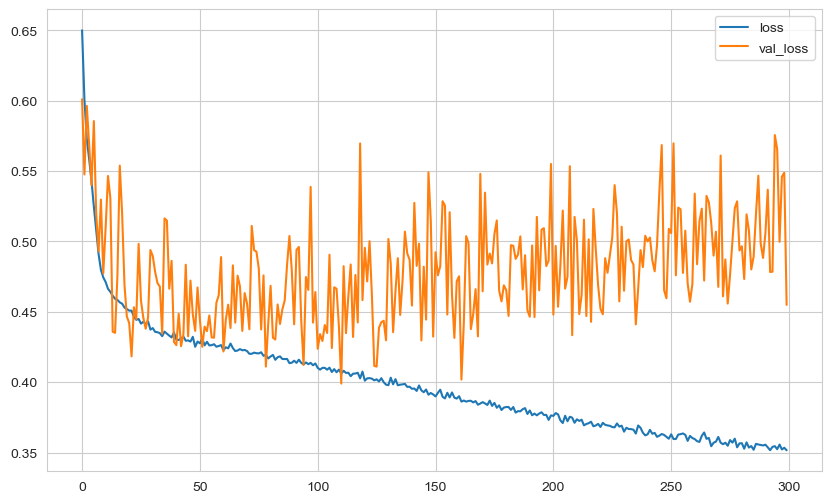

In [86]:
# If validation splits after certain value this means overfitting
loss_df[["loss","val_loss"]].plot()
plt.show()

In [87]:
model.evaluate(X_test, y_test, verbose=0)

[0.43619608879089355, 0.8180000185966492]

In [88]:
y_pred = model.predict(X_test, verbose=0) 
y_pred

array([[2.48448521e-01],
       [3.22797984e-01],
       [2.94621706e-01],
       [1.85552329e-01],
       [4.38228935e-01],
       [8.69627967e-02],
       [1.27775490e-01],
       [8.36953968e-02],
       [8.94327462e-01],
       [2.05382004e-01],
       [1.76295057e-01],
       [3.87186587e-01],
       [7.25857317e-02],
       [1.17696285e-01],
       [9.54544544e-03],
       [6.99945629e-01],
       [3.33236188e-01],
       [5.18427908e-01],
       [1.05954245e-01],
       [8.88474107e-01],
       [1.82758390e-06],
       [3.59016091e-01],
       [4.27688211e-01],
       [1.20271578e-01],
       [3.90895933e-01],
       [2.34763846e-01],
       [3.56321260e-02],
       [4.23197299e-02],
       [1.30733373e-02],
       [9.93118763e-01],
       [3.77910018e-01],
       [3.67292941e-01],
       [6.04839444e-01],
       [3.67731489e-02],
       [1.55907601e-01],
       [1.60809048e-02],
       [1.02277957e-02],
       [1.60758078e-01],
       [1.72037885e-01],
       [8.47892702e-01],


In [89]:
# we define the treshhold here to convert 0 amd 1
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[686 110]
 [ 72 132]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       796
           1       0.55      0.65      0.59       204

    accuracy                           0.82      1000
   macro avg       0.73      0.75      0.74      1000
weighted avg       0.83      0.82      0.82      1000



## Implementation of Different Methods to Develop The Model

- Implementing various methods to improve model performance
- Creating and evaluating the model for each method

### Increasing The Learning Rate and Observing The Results

In [90]:
from tensorflow.keras.optimizers import Adam

In [91]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Create an Adam optimizer with a learning rate of 0.005
opt = Adam(learning_rate=0.005)

# Compile the model with the optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [92]:
# Fit the model with the training data, validating on the validation data
model.fit(
    # Specify the training data
    x=X_train,
    y=y_train,
    # Specify the validation data
    validation_data=(X_val, y_val),
    # Set the batch size
    batch_size=batch_size,
    # Set the number of epochs to train for
    epochs=300,
    # Set the verbosity level to display training progress
    verbose=1,
)

Epoch 1/300


254/254 [==============================] - 3s 9ms/step - loss: 0.4775 - accuracy: 0.7936 - val_loss: 0.4575 - val_accuracy: 0.7978
Epoch 2/300
254/254 [==============================] - 2s 9ms/step - loss: 0.4269 - accuracy: 0.8160 - val_loss: 0.4218 - val_accuracy: 0.8078
Epoch 3/300
254/254 [==============================] - 2s 8ms/step - loss: 0.3800 - accuracy: 0.8407 - val_loss: 0.3939 - val_accuracy: 0.8278
Epoch 4/300
254/254 [==============================] - 2s 7ms/step - loss: 0.3578 - accuracy: 0.8543 - val_loss: 0.3899 - val_accuracy: 0.8356
Epoch 5/300
254/254 [==============================] - 2s 7ms/step - loss: 0.3503 - accuracy: 0.8543 - val_loss: 0.3943 - val_accuracy: 0.8289
Epoch 6/300
254/254 [==============================] - 2s 7ms/step - loss: 0.3487 - accuracy: 0.8581 - val_loss: 0.3765 - val_accuracy: 0.8300
Epoch 7/300
254/254 [==============================] - 2s 7ms/step - loss: 0.3420 - accuracy: 0.8557 - val_loss: 0.3848 - val_accuracy: 0.8378
Epoch 8/300

<Axes: >

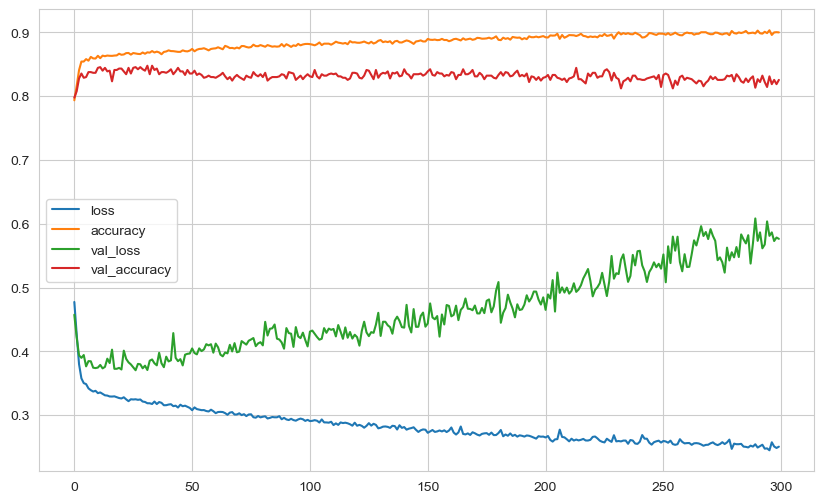

In [93]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [94]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5088937878608704
accuracy:  0.8410000205039978


In [95]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[747  49]
 [110  94]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.66      0.46      0.54       204

    accuracy                           0.84      1000
   macro avg       0.76      0.70      0.72      1000
weighted avg       0.83      0.84      0.83      1000



### Adding Dropout Layer

In [96]:
from tensorflow.keras.layers import Dropout

In [97]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))   # Each time 50% of 36 random units will be active

# Add a dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add another dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add another dropout layer with a dropout rate of 0.5. This is the recommended maximum.
model.add(Dropout(0.5))

# Add a dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add another dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Define the optimizer (Adam with a learning rate of 0.001) and compile the model with binary cross-entropy loss and accuracy metric
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [98]:
# Fit the model with the training data, validating on the validation data
model.fit(
    # Specify the training data
    x=X_train,
    y=y_train,
    # Specify the validation data
    validation_data=(X_val, y_val),
    # Set the batch size
    batch_size=batch_size,
    # Set the number of epochs to train for
    epochs=300,
    # Set the verbosity level to display training progress
    verbose=1,
)

Epoch 1/300


254/254 [==============================] - 3s 8ms/step - loss: 0.5918 - accuracy: 0.7340 - val_loss: 0.5045 - val_accuracy: 0.7967
Epoch 2/300
254/254 [==============================] - 2s 9ms/step - loss: 0.5351 - accuracy: 0.7926 - val_loss: 0.4892 - val_accuracy: 0.7967
Epoch 3/300
254/254 [==============================] - 2s 9ms/step - loss: 0.5111 - accuracy: 0.7957 - val_loss: 0.4795 - val_accuracy: 0.7967
Epoch 4/300
254/254 [==============================] - 2s 8ms/step - loss: 0.5059 - accuracy: 0.7962 - val_loss: 0.4796 - val_accuracy: 0.7967
Epoch 5/300
254/254 [==============================] - 2s 8ms/step - loss: 0.4996 - accuracy: 0.7963 - val_loss: 0.4736 - val_accuracy: 0.7967
Epoch 6/300
254/254 [==============================] - 2s 7ms/step - loss: 0.4947 - accuracy: 0.7963 - val_loss: 0.4704 - val_accuracy: 0.7967
Epoch 7/300
254/254 [==============================] - 2s 7ms/step - loss: 0.4898 - accuracy: 0.7962 - val_loss: 0.4661 - val_accuracy: 0.7967
Epoch 8/300

<Axes: >

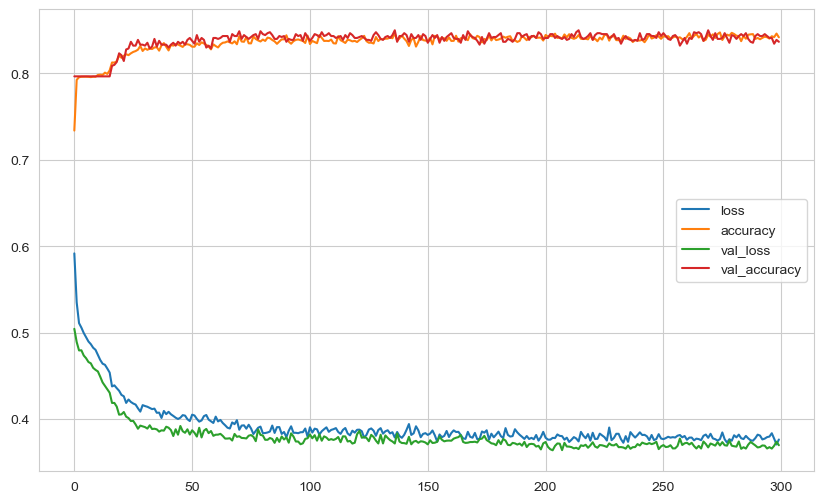

In [99]:
# because of drop out training cannot use all the nodes but validation does. So, the curves split
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [100]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3449866473674774
accuracy:  0.843999981880188


In [101]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[777  19]
 [137  67]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       796
           1       0.78      0.33      0.46       204

    accuracy                           0.84      1000
   macro avg       0.81      0.65      0.69      1000
weighted avg       0.84      0.84      0.82      1000



### Adding Early Stop

#### Monitoring the "val_loss" as metric

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

In [103]:
#We must reset the model. Otherwise it continues from where it left
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Create a sequential model
model = Sequential()

# Add a dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))

# Add a dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add a dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add a dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [104]:
# Instantiate the EarlyStopping callback
early_stop = EarlyStopping(
    # Monitor the validation loss
    monitor="val_loss",     # If this was 'val_accuracy' mode should be 'max'
    # Minimize the validation loss
    mode="min",
    # Print a message each time the callback is triggered
    verbose=1,
    # Wait for 10 epochs without improvement before stopping
    patience=10,
    # Restore the weights of the best model seen during training
    restore_best_weights=True)

In [105]:
# Fit the model with the training data, validating on the validation data
model.fit(
    # Specify the training data
    x=X_train,
    y=y_train,
    # Specify the validation data
    validation_data=(X_val, y_val),
    # Set the batch size
    batch_size=batch_size,
    # Set the number of epochs to train for
    epochs=300,
    # Set the verbosity level to display training progress
    verbose=1,
    # Add the early stopping callback to stop training when the validation loss plateaus
    callbacks=[early_stop],     #Callback works after every epoch
)

Epoch 1/300


254/254 [==============================] - 4s 11ms/step - loss: 0.5099 - accuracy: 0.7807 - val_loss: 0.4776 - val_accuracy: 0.7967
Epoch 2/300
254/254 [==============================] - 2s 10ms/step - loss: 0.4575 - accuracy: 0.8002 - val_loss: 0.4603 - val_accuracy: 0.8033
Epoch 3/300
254/254 [==============================] - 2s 9ms/step - loss: 0.4369 - accuracy: 0.8127 - val_loss: 0.4421 - val_accuracy: 0.8033
Epoch 4/300
254/254 [==============================] - 3s 10ms/step - loss: 0.4235 - accuracy: 0.8223 - val_loss: 0.4369 - val_accuracy: 0.8078
Epoch 5/300
254/254 [==============================] - 3s 11ms/step - loss: 0.4099 - accuracy: 0.8280 - val_loss: 0.4280 - val_accuracy: 0.8167
Epoch 6/300
254/254 [==============================] - 2s 9ms/step - loss: 0.3971 - accuracy: 0.8333 - val_loss: 0.4245 - val_accuracy: 0.8067
Epoch 7/300
254/254 [==============================] - 2s 9ms/step - loss: 0.3862 - accuracy: 0.8390 - val_loss: 0.4108 - val_accuracy: 0.8278
Epoch 8

<Axes: >

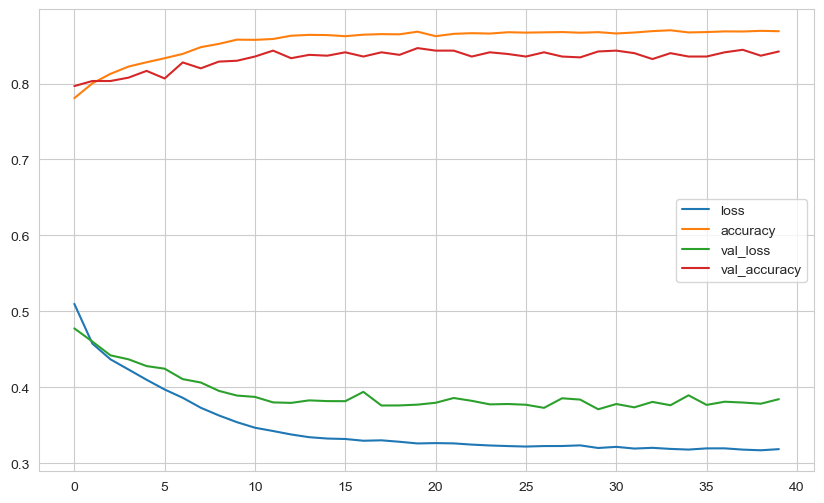

In [106]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [107]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3484290838241577
accuracy:  0.8560000061988831


In [108]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[755  41]
 [103 101]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.71      0.50      0.58       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



#### Monitoring the "val_recall" as metric

In [109]:
#We must reset the model. Otherwise it continues from where it left
# Set the random seed for reproducibility
tf.random.set_seed(42)

# Create a sequential model
model = Sequential()

# Add a dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))

# Add a dense layer with 18 units and ReLU activation
model.add(Dense(18, activation="relu"))

# Add a dense layer with 9 units and ReLU activation
model.add(Dense(9, activation="relu"))

# Add a dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [110]:
# Instantiate the EarlyStopping callback
early_stop = EarlyStopping(
    # Monitor the validation loss
    monitor="val_recall",     # If this was 'val_accuracy' mode should be 'max'
    # Minimize the validation loss
    mode="auto",
    # Print a message each time the callback is triggered
    verbose=1,
    # Wait for 10 epochs without improvement before stopping
    patience=10,
    # Restore the weights of the best model seen during training
    restore_best_weights=True)

In [111]:
# Fit the model with the training data, validating on the validation data
model.fit(
    # Specify the training data
    x=X_train,
    y=y_train,
    # Specify the validation data
    validation_data=(X_val, y_val),
    # Set the batch size
    batch_size=batch_size,
    # Set the number of epochs to train for
    epochs=300,
    # Set the verbosity level to display training progress
    verbose=1,
    # Add the early stopping callback to stop training when the validation loss plateaus
    callbacks=[early_stop], )    #Callback works after every epoch

Epoch 1/300


254/254 [==============================] - 4s 12ms/step - loss: 0.4875 - accuracy: 0.7963 - val_loss: 0.4817 - val_accuracy: 0.7967
Epoch 2/300
254/254 [==============================] - 3s 10ms/step - loss: 0.4630 - accuracy: 0.7968 - val_loss: 0.4638 - val_accuracy: 0.7956
Epoch 3/300
254/254 [==============================] - 2s 9ms/step - loss: 0.4422 - accuracy: 0.8062 - val_loss: 0.4419 - val_accuracy: 0.8078
Epoch 4/300
254/254 [==============================] - 2s 9ms/step - loss: 0.4266 - accuracy: 0.8181 - val_loss: 0.4301 - val_accuracy: 0.8100
Epoch 5/300
254/254 [==============================] - 2s 8ms/step - loss: 0.4108 - accuracy: 0.8242 - val_loss: 0.4154 - val_accuracy: 0.8167
Epoch 6/300
254/254 [==============================] - 2s 8ms/step - loss: 0.3928 - accuracy: 0.8342 - val_loss: 0.4068 - val_accuracy: 0.8233
Epoch 7/300
254/254 [==============================] - 2s 8ms/step - loss: 0.3761 - accuracy: 0.8440 - val_loss: 0.3890 - val_accuracy: 0.8333
Epoch 8/3

<Axes: >

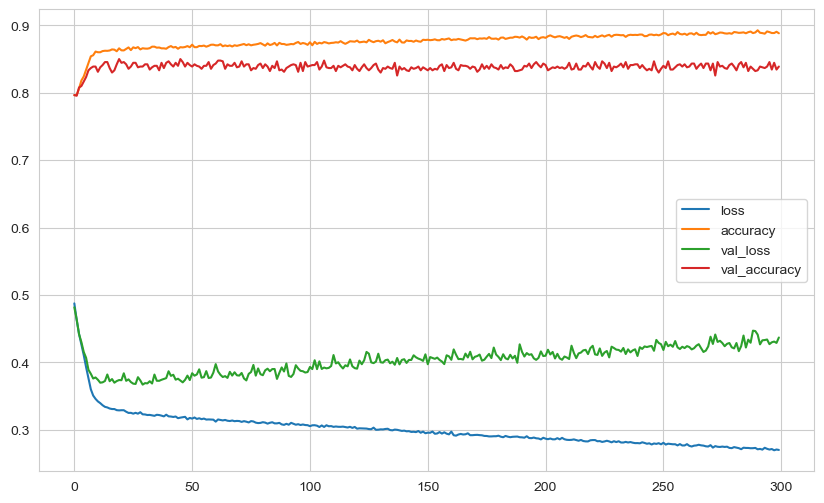

In [112]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [113]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.40086957812309265
accuracy:  0.8510000109672546


In [114]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[761  35]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.72      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



## Optuna

In [115]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [116]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True
)

In [117]:
tf.random.set_seed(42)

# This is the metric that will be used to evaluate the model's performance
trial_metric = "accuracy"

# This function creates a model for the machine learning task
def create_model(trial):
    # These are some hyperparameters that we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)  # The number of units in the first layer
    n_units2 = trial.suggest_int("n_units2", 8, 128)  # The number of units in the second layer
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])  # The optimizer to use
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1.3e-1, log=True)  # The learning rate for the optimizer
    
    # Create a Sequential model
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model  # Return the created model

# This function is the objective function to be minimized
def objective(trial):
    model = create_model(trial)  # Create a model using the function defined above
    w0 = trial.suggest_float("w0", 0.01, 5)  # Weight for class 0 for handling class imbalance
    w1 = trial.suggest_float("w1", 0.01, 5)  # Weight for class 1 for handling class imbalance
    # Fit the model to the training data
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val), 
        batch_size=batch_size,  
        epochs=300,  
        callbacks=[early_stop], 
        class_weight={0: w0, 1: w1},  # Class weights
        verbose=0,  # Verbosity mode
    )
    score = model.evaluate(X_val, y_val, verbose=0)[1]  # Evaluate the model on the test data
    return score  # Return the score


In [118]:
# Create a study object. The direction "maximize" means that the optimization problem is to maximize the objective function.
study = optuna.create_study(direction="maximize")

# Optimize the study. The objective function (defined earlier) is the function to be optimized, and n_trials is the number of trials.
study.optimize(objective, n_trials=10)

# Print the best parameters found during the optimization. These are the parameters that gave the highest return value of the objective function.
study.best_params

[I 2024-04-03 15:28:22,497] A new study created in memory with name: no-name-a6633190-9d11-4daf-9875-00c4bb1debb1


Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping


[I 2024-04-03 15:29:20,382] Trial 0 finished with value: 0.8411111235618591 and parameters: {'n_units1': 115, 'n_units2': 93, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.006186763666346601, 'w0': 1.9421872822109725, 'w1': 3.6901952742033854}. Best is trial 0 with value: 0.8411111235618591.


Restoring model weights from the end of the best epoch: 8.
Epoch 18: early stopping


[I 2024-04-03 15:30:43,784] Trial 1 finished with value: 0.8399999737739563 and parameters: {'n_units1': 28, 'n_units2': 123, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.04571690878979411, 'w0': 1.945457090941358, 'w1': 1.8551480182331985}. Best is trial 0 with value: 0.8411111235618591.


Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping


[I 2024-04-03 15:31:45,174] Trial 2 finished with value: 0.8322222232818604 and parameters: {'n_units1': 122, 'n_units2': 107, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.016051740308913577, 'w0': 2.127311431214189, 'w1': 4.253132851260688}. Best is trial 0 with value: 0.8411111235618591.


Restoring model weights from the end of the best epoch: 5.
Epoch 15: early stopping


[I 2024-04-03 15:32:24,459] Trial 3 finished with value: 0.8088889122009277 and parameters: {'n_units1': 105, 'n_units2': 37, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0008684349204445256, 'w0': 2.3216425135150947, 'w1': 0.4118320854088202}. Best is trial 0 with value: 0.8411111235618591.


Restoring model weights from the end of the best epoch: 8.
Epoch 18: early stopping


[I 2024-04-03 15:33:10,712] Trial 4 finished with value: 0.8344444632530212 and parameters: {'n_units1': 59, 'n_units2': 67, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.01718518231320017, 'w0': 2.8881369563343298, 'w1': 0.4533738346781226}. Best is trial 0 with value: 0.8411111235618591.


Restoring model weights from the end of the best epoch: 5.
Epoch 15: early stopping


[I 2024-04-03 15:33:42,852] Trial 5 finished with value: 0.8177777528762817 and parameters: {'n_units1': 90, 'n_units2': 94, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.01642314688663783, 'w0': 3.485555632366414, 'w1': 0.302046351644412}. Best is trial 0 with value: 0.8411111235618591.


Restoring model weights from the end of the best epoch: 133.
Epoch 143: early stopping


[I 2024-04-03 15:38:40,682] Trial 6 finished with value: 0.8033333420753479 and parameters: {'n_units1': 66, 'n_units2': 10, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 5.9123718444971005e-05, 'w0': 1.100968302582647, 'w1': 3.485759714624972}. Best is trial 0 with value: 0.8411111235618591.


Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping


[I 2024-04-03 15:39:04,345] Trial 7 finished with value: 0.79666668176651 and parameters: {'n_units1': 63, 'n_units2': 82, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.02089907000612564, 'w0': 4.77512426480235, 'w1': 1.4818387271123612}. Best is trial 0 with value: 0.8411111235618591.


Restoring model weights from the end of the best epoch: 7.
Epoch 17: early stopping


[I 2024-04-03 15:39:55,096] Trial 8 finished with value: 0.8500000238418579 and parameters: {'n_units1': 56, 'n_units2': 53, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.002363686346851296, 'w0': 2.8483474978286023, 'w1': 2.974565765874934}. Best is trial 8 with value: 0.8500000238418579.


Restoring model weights from the end of the best epoch: 17.
Epoch 27: early stopping


[I 2024-04-03 15:41:18,177] Trial 9 finished with value: 0.8222222328186035 and parameters: {'n_units1': 121, 'n_units2': 113, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0006526327714447859, 'w0': 3.6900090249943056, 'w1': 0.3734455944455173}. Best is trial 8 with value: 0.8500000238418579.


{'n_units1': 56,
 'n_units2': 53,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam,
 'learning_rate': 0.002363686346851296,
 'w0': 2.8483474978286023,
 'w1': 2.974565765874934}

In [119]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/300


254/254 [==============================] - 5s 15ms/step - loss: 0.4604 - Accuracy: 0.8051 - val_loss: 0.4333 - val_Accuracy: 0.8056
Epoch 2/300
254/254 [==============================] - 4s 14ms/step - loss: 0.3937 - Accuracy: 0.8357 - val_loss: 0.3959 - val_Accuracy: 0.8200
Epoch 3/300
254/254 [==============================] - 3s 12ms/step - loss: 0.3615 - Accuracy: 0.8465 - val_loss: 0.3845 - val_Accuracy: 0.8367
Epoch 4/300
254/254 [==============================] - 3s 11ms/step - loss: 0.3511 - Accuracy: 0.8579 - val_loss: 0.4014 - val_Accuracy: 0.8367
Epoch 5/300
254/254 [==============================] - 3s 11ms/step - loss: 0.3505 - Accuracy: 0.8565 - val_loss: 0.4461 - val_Accuracy: 0.7944
Epoch 6/300
254/254 [==============================] - 3s 12ms/step - loss: 0.3440 - Accuracy: 0.8588 - val_loss: 0.3906 - val_Accuracy: 0.8278
Epoch 7/300
254/254 [==============================] - 4s 15ms/step - loss: 0.3409 - Accuracy: 0.8588 - val_loss: 0.3760 - val_Accuracy: 0.8444
Epoc

### Evaluating The Model

- Plotting the model history to observe the changing of metrics
- Making prediction to see "confusion matrix" and "classification report"
- Checking ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [120]:
history = model.history.history

<Axes: >

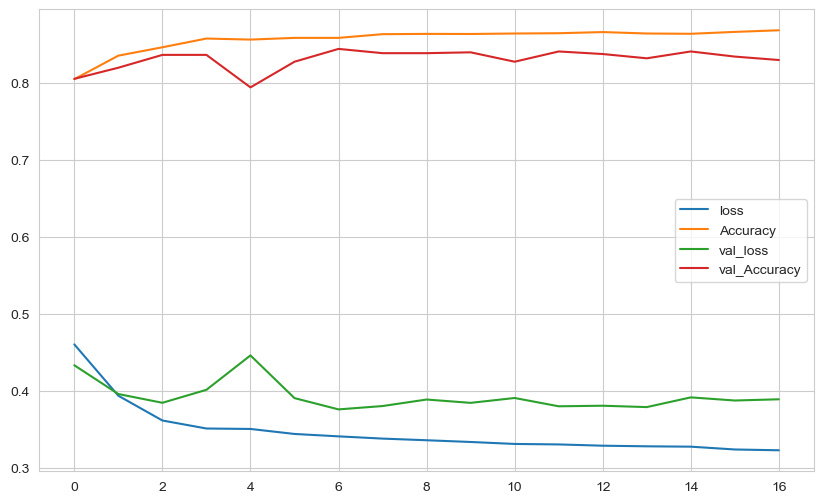

In [121]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [122]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 1/32 [..............................] - ETA: 5s

32/32 [==============================] - 0s 3ms/step
[[770  26]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.77      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



32/32 [==============================] - 0s 4ms/step


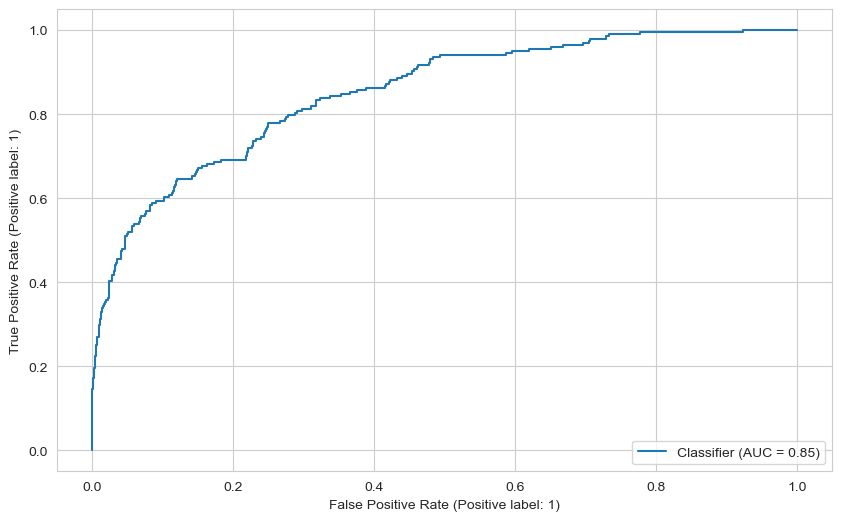

In [123]:
# if the data is imbalanced we check precision recall curve. But here we check roccurve. it is aroun 0.8 which means good
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [124]:
roc_auc_score(y_test, y_pred_proba)

0.8509766972115479

# Final Model and Model Deployment

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=42
)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100


282/282 [==============================] - 6s 13ms/step - loss: 0.4565 - recall: 0.0982 - val_loss: 0.4405 - val_recall: 0.2549
Epoch 2/100
282/282 [==============================] - 4s 13ms/step - loss: 0.4152 - recall: 0.2640 - val_loss: 0.4178 - val_recall: 0.1422
Epoch 3/100
282/282 [==============================] - 4s 15ms/step - loss: 0.3773 - recall: 0.3606 - val_loss: 0.3756 - val_recall: 0.3137
Epoch 4/100
282/282 [==============================] - 3s 12ms/step - loss: 0.3549 - recall: 0.4146 - val_loss: 0.3675 - val_recall: 0.4706
Epoch 5/100
282/282 [==============================] - 4s 13ms/step - loss: 0.3495 - recall: 0.4392 - val_loss: 0.3529 - val_recall: 0.3775
Epoch 6/100
282/282 [==============================] - 3s 11ms/step - loss: 0.3467 - recall: 0.4435 - val_loss: 0.3458 - val_recall: 0.4069
Epoch 7/100
282/282 [==============================] - 4s 13ms/step - loss: 0.3422 - recall: 0.4610 - val_loss: 0.3483 - val_recall: 0.4608
Epoch 8/100
282/282 [===========

In [127]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step


[[769  27]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.75      1000
weighted avg       0.85      0.86      0.85      1000



## Prediction

In [128]:
single_customer = df.drop("Exited", axis=1).iloc[11:12, :]
single_customer

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
11,0.000,0.000,1.000,0.000,1.000,497,24,3,0.000,2,1,0,76390.010


In [129]:
single_customer = scaler.transform(single_customer)
single_customer

array([[0.        , 0.        , 1.        , 0.        , 1.        ,
        0.294     , 0.08108108, 0.3       , 0.        , 0.33333333,
        1.        , 0.        , 0.38192862]])

In [130]:
(model.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 37ms/step


array([[0]])

In [131]:
df["Exited"].iloc[1]

0